In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
img_files = glob('00_data/*jpg')
print(img_files)
print(img_files[0])

['00_data/image_15.jpg', '00_data/image_29.jpg', '00_data/image_28.jpg', '00_data/image_14.jpg', '00_data/image_16.jpg', '00_data/image_17.jpg', '00_data/image_13.jpg', '00_data/image_12.jpg', '00_data/image_38.jpg', '00_data/image_10.jpg', '00_data/image_11.jpg', '00_data/image_39.jpg', '00_data/image_8.jpg', '00_data/image_9.jpg', '00_data/image_2.jpg', '00_data/image_3.jpg', '00_data/image_40.jpg', '00_data/image_1.jpg', '00_data/image_4.jpg', '00_data/image_5.jpg', '00_data/image_7.jpg', '00_data/image_6.jpg', '00_data/image_34.jpg', '00_data/image_20.jpg', '00_data/image_21.jpg', '00_data/image_35.jpg', '00_data/image_23.jpg', '00_data/image_37.jpg', '00_data/image_36.jpg', '00_data/image_22.jpg', '00_data/image_26.jpg', '00_data/image_32.jpg', '00_data/image_33.jpg', '00_data/image_27.jpg', '00_data/image_19.jpg', '00_data/image_31.jpg', '00_data/image_25.jpg', '00_data/image_24.jpg', '00_data/image_30.jpg', '00_data/image_18.jpg']
00_data/image_15.jpg


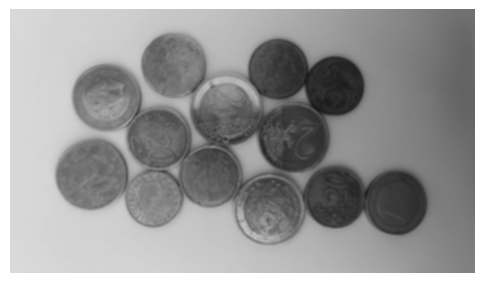

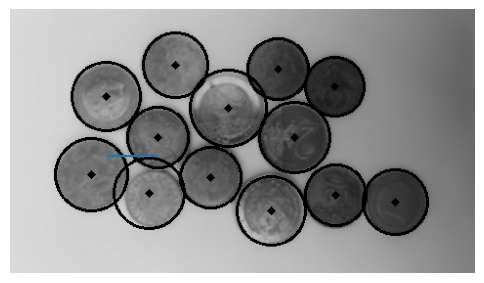

In [ ]:
img_num = 1

img_n = os.path.basename(img_files[img_num]).split('.')[0]
img = cv2.imread(f'00_data/{img_n}.jpg')
img = img[:,:img.shape[1]-int(img.shape[1]*0.01), :]
img = cv2.resize(img, None, fx = .5, fy=.5)


img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imgPre = cv2.GaussianBlur(img, (3,3), 2)

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

circulos = cv2.HoughCircles(
    imgPre,
    cv2.HOUGH_GRADIENT,
    dp=1.2,               # Inverso de la resolución acumuladora
    minDist=50,           # Distancia mínima entre centros de círculos
    param1=50,            # Umbral del detector de bordes Canny
    param2=30,            # Umbral del acumulador (más bajo = más círculos detectados)
    minRadius=30,         # Radio mínimo de los círculos
    maxRadius=50          # Radio máximo de los círculos
)

if circulos is not None:
    # Convertir a enteros
    circulos = np.uint16(np.around(circulos))
    for circulo in circulos[0, :]:
        # Dibujar el contorno del círculo
        cv2.circle(imgPre, (circulo[0], circulo[1]), circulo[2], (0, 255, 0), 2)
        # Dibujar el centro del círculo
        cv2.circle(imgPre, (circulo[0], circulo[1]), 2, (0, 0, 255), 3)


f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))

ax.plot([100,150], [150, 150])
ax.axis('off')
plt.show()


image_29 1
Número de contornos detectados: 1


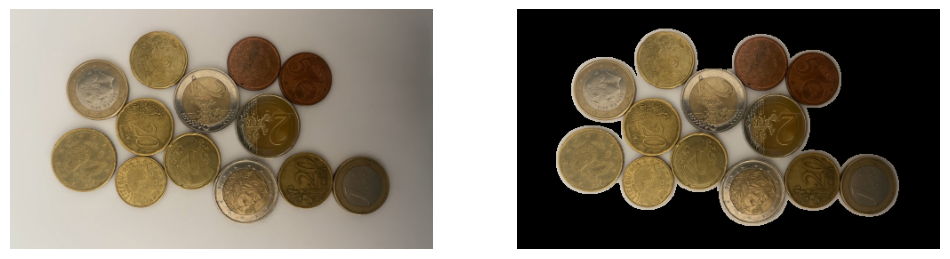

In [4]:
img_num = 2

for img_num in range(1,2):
# for img_num in range(len(img_files)):
    img_n = os.path.basename(img_files[img_num]).split('.')[0]
    img = cv2.imread(f'00_data/{img_n}.jpg')
    img = img[:,:img.shape[1]-int(img.shape[1]*0.01), :]
    img = cv2.resize(img, None, fx = .5, fy=.5)


    imgPre = cv2.GaussianBlur(img, (3,3), 2)
    imgPre = cv2.Canny(imgPre, 71 ,102)
    kernel = np.ones((3, 3), np.uint8)
    imgPre = cv2.dilate(imgPre, kernel, iterations=2)
    
    contornos, _ = cv2.findContours(imgPre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(img_n, img_num)
    print(f"Número de contornos detectados: {len(contornos)}")

    imagen_contornos = img.copy()
    cv2.drawContours(imagen_contornos, contornos, -1, (255, 0, 0), 2)

    # f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
    # ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # ax1.axis('off')
    # ax2.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
    # ax2.axis('off')
    # ax3.imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB))
    # ax3.axis('off')
    # plt.show()

    ##################################################
    ##################################################
    ##################################################

    mascara = np.zeros_like(imgPre)

    cv2.drawContours(mascara, contornos, -1, 255, thickness=cv2.FILLED)


    # f, ax = plt.subplots(figsize=(6, 6))
    # ax.imshow(cv2.cvtColor(mascara, cv2.COLOR_BGR2RGB))
    # ax.axis('off')
    # plt.show()

    imagen_recortada = cv2.bitwise_and(img, img, mask=mascara)

    # f, ax = plt.subplots(figsize=(6, 6))
    # ax.imshow(cv2.cvtColor(imagen_recortada, cv2.COLOR_BGR2RGB))
    # ax.axis('off')
    # plt.show()
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.axis('off')
    ax2.imshow(cv2.cvtColor(imagen_recortada, cv2.COLOR_BGR2RGB))
    ax2.axis('off')
    plt.show()
